In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''
    Now try to use the dataset to build some models.
    Here are three traditional models: 
    RandomForest, SVM, LogisticRegression
    
    Before directly using the raw dataset, under sampling
    is used to balance the number of churner and non-churner.
    
    AUC of ROC is used to compare different models, and it is 
    also used to check if the raw dataset is similar to dataset
    in the paper.
'''


df = pd.read_csv('tagpro_dataset_5d10d.csv')
df.drop(['user'], axis=1, inplace=True)

In [3]:
# set random seed, and sample the indices of churner
# so that the churner and the non-churner are balanced

np.random.seed(9)

churn_indices = df.loc[df['churner'] == 1].index
nonchurn_indices = np.array(df.loc[df['churner']==0].index)
rand_churn_indices = np.random.choice(churn_indices,
                                      len(nonchurn_indices),
                                      replace=False)

under_sample_indices = np.concatenate([nonchurn_indices, 
                                       rand_churn_indices])

In [4]:
# Now the num of both churn and nonchurn is 22964

under_sample = df.iloc[under_sample_indices]
under_sample

active_duration  consecutive_play_ratio  mean_score  play_count  \
0               401676           401676.000000   27.000000           2   
1               412962            41296.200000   40.727273          11   
2               280615             9676.379310   40.966667          30   
3               371851            74370.200000   24.000000           6   
4               321418           321418.000000   29.500000           2   
...                ...                     ...         ...         ...   
47650              359              359.000000   80.000000           2   
51424             9381             3127.000000   11.500000           4   
23541           258868            43144.666667   24.571429           7   
7788            250431            12521.550000   57.571429          21   
22894           297490             4440.149254   16.102941          68   

        sd_score  win_ration  best_score  best_score_index  \
0       5.656854    1.000000          31          0.000000   
1      22.680789    0.000000          91          0.818182   
2      17.402900    0.966667         100          0.400000   
3      11.781341    0.833333          37          0.000000   
4       4.949747    1.000000          33          0.000000   
...          ...         ...         ...               ...   
47650  12.727922    1.000000          89          0.500000   
51424  14.341083    0.250000          33          0.750000   
23541  11.674147    1.000000          35          0.571429   
7788   29.788540    1.000000         120          0.190476   
22894  14.600286    0.941176          82          0.705882   

       best_sub_mean_count  best_sub_mean_ratio  mean_game_duration  \
0                 2.000000             0.148148        18564.500000   
1                 4.570248             1.234375        17185.090909   
2                 1.967778             1.441009        19014.766667   
3                 2.166667             0.541667        13415.000000   
4                 1.750000             0.118644        14452.500000   
...                    ...                  ...                 ...   
47650             4.500000             0.112500        17636.500000   
51424             5.375000             1.869565        11904.250000   
23541             1.489796             0.424419        16605.571429   
7788              2.972789             1.084367        15611.809524   
22894             0.969074             4.092237        13962.088235   

       worst_score  churner  
0               23        0  
1               15        0  
2                8        0  
3                6        0  
4               26        0  
...            ...      ...  
47650           71        1  
51424            4        1  
23541            1        1  
7788            19        1  
22894          -15        1  

[45928 rows x 13 columns]

In [5]:
print("# of churner: ", len(under_sample[under_sample['churner']==1]))
print("# of nonchurner: ", len(under_sample[under_sample['churner']==0]))

# of churner:  22964
# of nonchurner:  22964


In [6]:
# seperate features and label

Y = under_sample['churner'].values
X = under_sample.drop(['churner'], axis=1)

In [7]:
# Splite the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [8]:
X_train

active_duration  consecutive_play_ratio  mean_score  play_count  \
39201            91477            13068.142857   19.500000           8   
4506            299214            99738.000000   43.500000           4   
42886              881              881.000000   20.500000           2   
6299              6525             6525.000000   11.500000           2   
64227           229798            25533.111111   42.900000          10   
...                ...                     ...         ...         ...   
63614           182178            11386.125000   38.117647          17   
65628              674              674.000000   42.000000           2   
59472           418295            10457.375000   49.292683          41   
29031           298129            18633.062500   40.294118          17   
36479           390178            55739.714286   22.000000           8   

        sd_score  win_ration  best_score  best_score_index  \
39201  15.892496    0.750000          42          0.000000   
4506   10.214369    1.000000          53          0.500000   
42886  28.991378    0.500000          41          0.000000   
6299   16.263456    0.500000          23          0.000000   
64227  21.068407    1.000000          85          0.200000   
...          ...         ...         ...               ...   
63614  17.028955    0.000000          80          0.176471   
65628   0.000000    1.000000          42          0.000000   
59472  31.464459    0.000000         160          0.024390   
29031  25.731218    0.941176          87          0.352941   
36479  16.492423    1.000000          49          0.000000   

       best_sub_mean_count  best_sub_mean_ratio  mean_game_duration  \
39201             2.812500             1.153846        21237.000000   
4506              2.375000             0.218391        27577.000000   
42886            10.250000             1.000000        13922.000000   
6299              5.750000             1.000000        18255.500000   
64227             4.210000             0.981352        20176.100000   
...                    ...                  ...                 ...   
63614             2.463668             1.098765        21673.176471   
65628             0.000000             0.000000        30080.500000   
59472             2.700178             2.245918        18329.048780   
29031             2.747405             1.159124        16982.294118   
36479             3.375000             1.227273        19970.375000   

       worst_score  
39201           -9  
4506            29  
42886            0  
6299             0  
64227           21  
...            ...  
63614            0  
65628           42  
59472            0  
29031            0  
36479            1  

[32149 rows x 12 columns]

In [10]:
# A random forest model is built

from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=31, random_state=30)
model_RF.fit(X_train, Y_train)

pred_RF = model_RF.predict_proba(X_test)

In [12]:
feature_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

active_duration           0.298303
consecutive_play_ratio    0.145478
mean_game_duration        0.076607
best_sub_mean_ratio       0.069713
best_sub_mean_count       0.066182
mean_score                0.063366
sd_score                  0.062616
best_score                0.053409
worst_score               0.048031
play_count                0.047038
best_score_index          0.038655
win_ration                0.030602
dtype: float64


## SVM classifier and Logistic classifier

In [13]:
Y = under_sample['churner'].values
X = under_sample.drop(['churner'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [14]:
# Before using SVM and Logistic classifier
# Standardizing the data is very important

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
# SVM is fitted

from sklearn.svm import SVC

model_SVC = SVC(kernel='rbf', random_state=30)
model_SVC.fit(X_train, Y_train)

pred_svm = model_SVC.decision_function(X_test)

In [16]:
# Logistic is fitted

from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)

pred_logistic = model_logistic.decision_function(X_test)

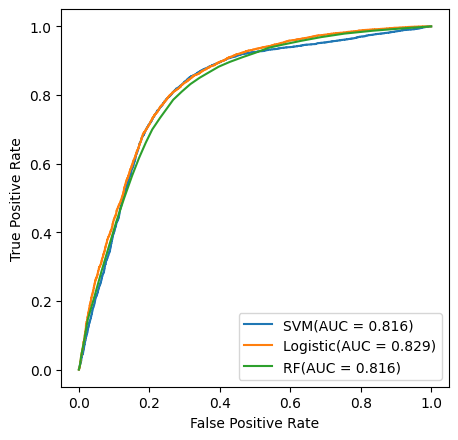

In [17]:
# compute metrics and visualize them

from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold_svm = roc_curve(Y_test, pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

logistic_fpr, logistice_tpr, threshold_logistic = roc_curve(Y_test, pred_logistic)
auc_logistic = auc(logistic_fpr, logistice_tpr)

RF_fpr, RF_tpr, threshold_RF = roc_curve(Y_test, pred_RF[:,1])
auc_RF = auc(RF_fpr, RF_tpr)


# Visualization the three curves
plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM(AUC = %0.3f)'% auc_svm)
plt.plot(logistic_fpr, logistice_tpr, linestyle='-', label='Logistic(AUC = %0.3f)'% auc_logistic)
plt.plot(RF_fpr, RF_tpr, linestyle='-', label='RF(AUC = %0.3f)'% auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()


'''
    In the paper, 
    AUC of LogisticReg model : 0.824
    AUC of RandomForest(RF) : 0.822
'''